In [1]:
import sys
sys.path.insert(0, "../../python")

import os
import numpy as np
from vsim import plot
from vsim import load
from vsim import analyze
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('notes')
from scipy.optimize import curve_fit
import scipy.constants as const
e = const.physical_constants['elementary charge'][0]

pathPre = '/media/robert/Data_Storage/VSim/Matched-Accelerating-Gradient/3DConvergence_Tests/'
simName = 'AccelGradient'

Start: 280.80, End: 162.00, Length:118.80
Bottom: 107.30, Top: 192.70, Width:85.40


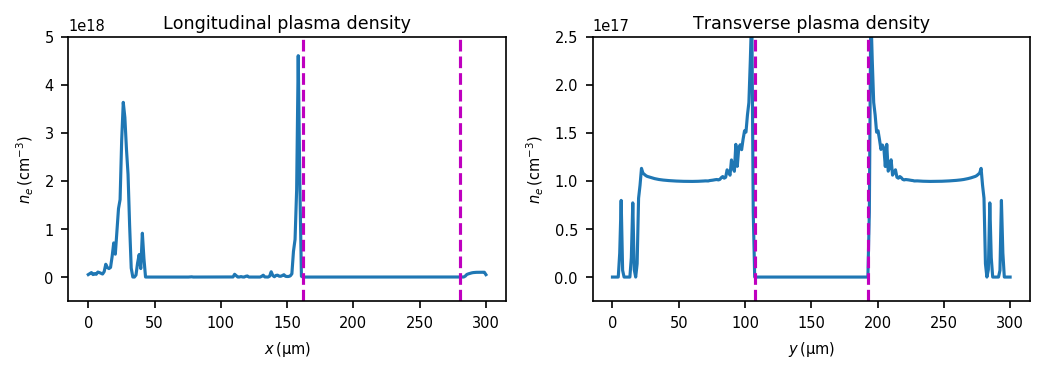

In [2]:
# Plotting the plasma density
path = pathPre + '1e17PlasmaDensity/InitialWakeSize/'
rho, rhoAttrs = load.load_field(path, simName, 'rhoPlasma')
Nx, Ny, Nz = analyze.get_shape(rho[5])
rhoX = -rho[5][:, int(Ny+1)/2, int(Nz+1)/2, 0]/e/1e6
rhoY = -rho[5][175, :, int(Nz+1)/2, 0]/e/1e6
x = np.linspace(0, 300, Nx)
y = np.linspace(0, 300, Ny)

def find_length(rhoX, x, Nx):
    eps = 1e6
    for i in range(Nx-1, -1, -1):
        if rhoX[i] >= eps and rhoX[i-1] < eps:
            start = x[i-1]
        if rhoX[i] <= eps and rhoX[i-1] > eps:
            end = x[i]
            return start, end
length = find_length(rhoX, x, Nx)
print('Start: %0.2f, End: %0.2f, Length:%0.2f' % (length[0], length[1], length[0]-length[1]))

def find_width(rhoY, y, Ny):
    eps = 1e6
    for i in range(int(Ny/4), int(3*Ny/4)):
        if rhoY[i] >= eps and rhoY[i+1] < eps:
            start = y[i+1]
        if rhoY[i] <= eps and rhoY[i+1] > eps:
            end = y[i]
            return start, end
widthArr = np.zeros(50, dtype='double')
for i in range(150, 200):
    rhoYi = -rho[5][i, :, int(Nz+1)/2, 0]/e/1e6
    width = find_width(rhoYi, y, Ny)
    widthArr[i-150] = width[1]-width[0]
rhoY = -rho[5][np.argmax(widthArr)+150, :, int(Nz+1)/2, 0]/e/1e6
    
width = find_width(rhoY, y, Ny)
print('Bottom: %0.2f, Top: %0.2f, Width:%0.2f' % (width[0], width[1], width[1]-width[0]))

plt.figure(figsize=(7,2.5), dpi=150)
gs = gridspec.GridSpec(1, 2)
plt.subplot(gs[0, 0])
plt.plot(x, rhoX)
plt.plot([length[0], length[0]], [-0.5e18, 5e18], 'm--')
plt.plot([length[1], length[1]], [-0.5e18, 5e18], 'm--')
plt.title('Longitudinal plasma density')
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$n_e\,(\mathrm{cm^{-3}})$')
plt.ylim([-0.5e18, 5e18])

plt.subplot(gs[0, 1])
plt.plot(y, rhoY)
plt.title('Transverse plasma density')
plt.plot([width[0], width[0]], [-0.25e17, 2.5e17], 'm--')
plt.plot([width[1], width[1]], [-0.25e17, 2.5e17], 'm--')
plt.xlabel(r'$y\,(\mathrm{\mu m})$')
plt.ylabel(r'$n_e\,(\mathrm{cm^{-3}})$')
plt.ylim([-0.25e17, 2.5e17])
plt.tight_layout()
plt.show()

Start: 84.00, End: 37.00, Length:47.00
Bottom: 31.45, Top: 68.55, Width:37.10


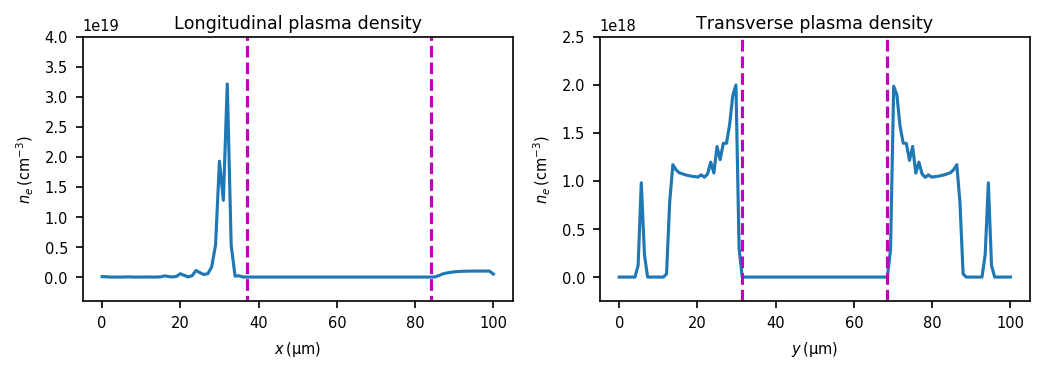

In [7]:
# Plotting the plasma density
path = pathPre + '1e18PlasmaDensity/InitialWakeSize/'
rho, rhoAttrs = load.load_field(path, simName, 'rhoPlasma')
Nx, Ny, Nz = analyze.get_shape(rho[5])
rhoX = -rho[5][:, int(Ny+1)/2, int(Nz+1)/2, 0]/e/1e6
x = np.linspace(0, 100, Nx)
y = np.linspace(0, 100, Ny)

length = find_length(rhoX, x, Nx)
print('Start: %0.2f, End: %0.2f, Length:%0.2f' % (length[0], length[1], length[0]-length[1]))

widthArr = np.zeros(50, dtype='double')
for i in range(35, 65):
    rhoYi = -rho[5][i, :, int(Nz+1)/2, 0]/e/1e6
    width = find_width(rhoYi, y, Ny)
    widthArr[i-35] = width[1]-width[0]
rhoY = -rho[5][np.argmax(widthArr)+35, :, int(Nz+1)/2, 0]/e/1e6
    
width = find_width(rhoY, y, Ny)
print('Bottom: %0.2f, Top: %0.2f, Width:%0.2f' % (width[0], width[1], width[1]-width[0]))

plt.figure(figsize=(7,2.5), dpi=150)
gs = gridspec.GridSpec(1, 2)
plt.subplot(gs[0, 0])
plt.plot(x, rhoX)
plt.plot([length[0], length[0]], [-0.5e19, 5e19], 'm--')
plt.plot([length[1], length[1]], [-0.5e19, 5e19], 'm--')
plt.title('Longitudinal plasma density')
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$n_e\,(\mathrm{cm^{-3}})$')
plt.ylim([-0.4e19, 4e19])

plt.subplot(gs[0, 1])
plt.plot(y, rhoY)
plt.title('Transverse plasma density')
plt.plot([width[0], width[0]], [-0.25e18, 2.5e18], 'm--')
plt.plot([width[1], width[1]], [-0.25e18, 2.5e18], 'm--')
plt.xlabel(r'$y\,(\mathrm{\mu m})$')
plt.ylabel(r'$n_e\,(\mathrm{cm^{-3}})$')
plt.ylim([-0.25e18, 2.5e18])
plt.tight_layout()
plt.show()